# Pandas 3
### Rachel Bennett
### Math 403
### September 14, 2021

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [4]:
def prob1():
    """
    Use groupby objects to determine information about private
    and public universities.
    Specifically examine the columns 'S.F.Ratio', 'Top10perc',
    and 'Top25perc'.
    For each column return the values of the describe function
    for the type of university with the higher mean.
    
    Return:
        ans_1 (ndarray): describe array of universities with 
                         higher S.F.Ratio
        ans_2 (ndarray): describe array of universities with
                         more students from Top10perc
        ans_3 (ndarray): describe array of universities with
                         more students from Top25perc
    """
    school = pd.read_csv("college.csv",index_col=0)
    private = school.groupby("Private")
    
    #For S.F. Ratio
    group = private["S.F.Ratio"].describe()["mean"].idxmax() #This value is either Yes or No. 
    arr1 = private.get_group(group)["S.F.Ratio"].describe()
    
    #For Top 10%
    group = private["Top10perc"].describe()["mean"].idxmax() #This value is either Yes or No. 
    arr2 = private.get_group(group)["Top10perc"].describe()
    
    #For Top 25%
    group = private["Top25perc"].describe()["mean"].idxmax() #This value is either Yes or No. 
    arr3 = private.get_group(group)["Top25perc"].describe()

    return arr1.values, arr2.values, arr3.values

In [5]:
prob1()

(array([212.        ,  17.13915094,   3.41804873,   6.7       ,
         15.1       ,  17.25      ,  19.325     ,  28.8       ]),
 array([565.        ,  29.33097345,  17.85139147,   1.        ,
         17.        ,  25.        ,  36.        ,  96.        ]),
 array([565.        ,  56.95752212,  19.58836048,   9.        ,
         42.        ,  55.        ,  70.        , 100.        ]))

# Problem 2

In [8]:
def prob2():
    """
    Use groupby visualizations to compare the following
    in private and public universities:
        1. Number of applicants, accept applicants, and
           enrolled applicants
        2. Range of price for room and board
    """
    
    school = pd.read_csv("college.csv",index_col=0)
    private = school.groupby("Private") #Comparing private an dpublic
   
    
    #school.boxplot(["Accept"], by = "Private",grid=False)
    private[["Apps", "Accept", "Enroll"]].mean().plot(title="Average number of applicants, accepted students, and enrolled students by type of University", kind="barh",xerr = private.std())
    plt.tight_layout() #makes a tighter layout
    
    school.boxplot(["Room.Board"], by = "Private",grid=False)
    plt.ylabel("Cost")

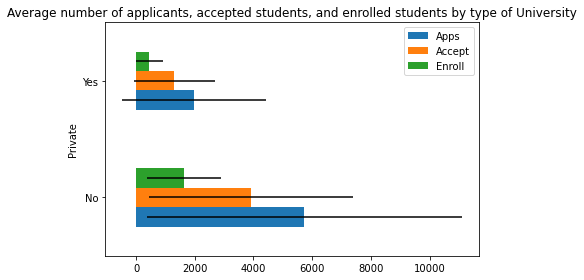

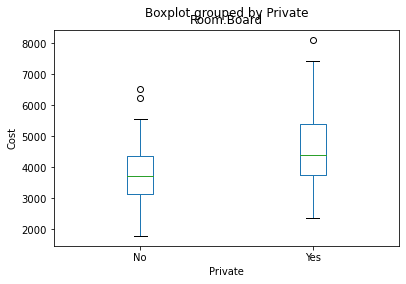

In [9]:
prob2()

# Problem 3

In [78]:
def prob3():
    """
    Use Ohio_1999.csv and pivot tables to answer the
    following questions
        1. Which race/sex combination makes the most money in aggregate?
        2. Which race/sex combination worked the least amount of 
            cumulative hours?
        3. What race/sex combination worked the most hours per week per person?
    
    Returns:
        ans_1 (tuple): tuple with race and sex code, respectively
        ans_2 (tuple): tuple with race and sex code, respectively
        ans_3 (tuple): tuple with race and sex code, respectively
    """
    ohio = pd.read_csv("Ohio_1999.csv")
    pivot_1 = ohio.pivot_table(values="Usual Weekly Earnings",index=["Sex"],columns="Race",aggfunc="sum") #We want to look at race and sex
    pivot_2 = ohio.pivot_table(values="Usual Hours Worked",index=["Sex"],columns="Race", aggfunc="sum") #Looking for lowest SUM since it's cumulative
    pivot_3 = ohio.pivot_table(values="Usual Hours Worked",index=["Sex"],columns="Race", aggfunc= np.average) #np.average gets us the average nubmer worked
    #print(pivot_1)
    #print(pivot_2)
    #print(pivot_3)
    ans_1 = (1,1)
    ans_2 = (3,2)
    ans_3 = (3,1)
    
    
    return ans_1, ans_2, ans_3
    
    
    """
    private[["Apps", "Accept", "Enroll"]].mean().plot(title="Average number of applicants, accepted students, and enrolled students by type of University", kind="barh",xerr = private.std())
    plt.tight_layout()
    
    school.boxplot(["Room.Board"], by = "Private",grid=False)
    plt.ylabel("Cost")
    """

In [79]:
print(prob3())

((1, 1), (3, 2), (3, 1))


# Problem 4

In [130]:
def prob4():
    """
    Use Ohio_1999.csv to answer the following questions:
        1. What is the most common degree among workers?
        2. Which interval has the most workers?
        3. What age/degree combination has the smallest yearly
           salary on average?
    
    Return:
        ans_1 (Interval): degree interval
        ans_2 (Interval): age interval
        ans_3 (Interval, Interval): age interval and degree interval
    """
    ohio = pd.read_csv("Ohio_1999.csv")
    edu = pd.cut(ohio['Educational Attainment'],[0,39,43,46])
    pivot_1 = ohio.pivot_table(index=[edu],aggfunc="count") #We want to look at race and sex
    pivot_2 = ohio.pivot_table(values = "Usual Hours Worked", index = pd.qcut(ohio['Educational Attainment'],6,duplicates="drop"))
   
    return pivot_1.sum(axis=1).idxmax(), pivot_2.sum(axis=1).idxmax()

In [131]:
prob4()

(Interval(39, 43, closed='right'), Interval(43.0, 46.0, closed='right'))

# Problem 5

In [175]:
def prob5():
    """
    Use College.csv to answer the following questions:
        1. Is there a correlation between the percent of alumni
           that donate and the amount the school spends per
           student in both private and public universities?
        2. Is the graduation rate partition with the greatest
           number of schools the same for private and public
           universities?
        3. Is there an inverse correlation between acceptance
           rate and having students from the top 10% of their
           high school class?
        4. Why is the average percentage of students admitted
           from the top 10 percent of their high school class
           so high in private universities with very low
           acceptance rates?
    
    Returns:
        ans_1 (bool): answer to question 1
        ans_2 (bool): answer to question 2
        ans_3 (bool): answer to question 3
        ans_4 (str): answer to question 4
    """
    college = pd.read_csv("college.csv")
    # check on percent alumni, correlated with expenditure?
    pivot_1 = college.pivot_table(values="perc.alumni",index = pd.qcut(college['Expend'],20),aggfunc="count")
    #print(pivot_1)
    return (False,None, None, None)

In [176]:
prob5()

(False, None, None, None)